# Muller price-unit prediction

In [1]:
# data wrangling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load product and sales data into dataframes
df_product = pd.read_csv("data/product.csv")
df_sales = pd.read_csv("data/sales.csv")

In [3]:
# explore product data
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            27 non-null     int64 
 1   brand                 27 non-null     object
 2   flavour               27 non-null     object
 3   volume_per_joghurt_g  27 non-null     int64 
 4   packsize              27 non-null     int64 
 5   product_id            27 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


In [4]:
df_product.describe(include="all")

,Unnamed: 0,brand,flavour,volume_per_joghurt_g,packsize,product_id
count,27.000000,27,27,27.000000,27.000000,27.000000
unique,NaN,9,5,NaN,NaN,NaN
top,NaN,Danone,blueberry,NaN,NaN,NaN
freq,NaN,5,7,NaN,NaN,NaN
mean,13.000000,NaN,NaN,625.925926,4.703704,13.000000
std,7.937254,NaN,NaN,342.886607,2.232880,7.937254
min,0.000000,NaN,NaN,150.000000,1.000000,0.000000
25%,6.500000,NaN,NaN,500.000000,3.500000,6.500000
50%,13.000000,NaN,NaN,500.000000,6.000000,13.000000
75%,19.500000,NaN,NaN,1000.000000,6.000000,19.500000


In [5]:
df_product.head()

,Unnamed: 0,brand,flavour,volume_per_joghurt_g,packsize,product_id
0,0,Mueller,blueberry,150,6,0
1,1,Oikos,chocolate,1000,1,1
2,2,Alnatura,strawberry,1000,1,2
3,3,Mueller,straciatella,500,6,3
4,4,Danone,straciatella,150,6,4


### Product data contains the following columns:

brand: Categorical variable with 9 unique values.

flavour: Categorical variable with 5 unique values.

volume_per_joghurt_g: Numerical variable with 3 possible values 150, 500 and 1000 g.

packsize: Numerical variable with 2 possible values 1 and 6.

Unnamed: 0/product_id: Numerical values with the same range as the index, 27 different products in total.

In [6]:
# Unique brands
df_product.brand.unique()

array(['Mueller', 'Oikos', 'Alnatura', 'Danone', 'Rewe', 'Activia', 'Ja!',
       'Ecke-Mit-Was-Drin', 'Actimel'], dtype=object)

In [7]:
# Unique flavours
df_product.flavour.unique()

array(['blueberry', 'chocolate', 'strawberry', 'straciatella',
       'raspberry'], dtype=object)

In [8]:
# explor sales data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  260 non-null    int64  
 1   date        260 non-null    object 
 2   product_id  260 non-null    int64  
 3   price       260 non-null    float64
 4   units       260 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 10.3+ KB


In [9]:
df_sales.describe(include="all")

,Unnamed: 0,date,product_id,price,units
count,260.000000,260,260.000000,260.000000,260.000000
unique,NaN,10,NaN,NaN,NaN
top,NaN,2020-01-07,NaN,NaN,NaN
freq,NaN,27,NaN,NaN,NaN
mean,133.611538,NaN,12.911538,5.288538,1177.496154
std,78.528842,NaN,7.846738,1.881547,401.771103
min,0.000000,NaN,0.000000,1.460000,16.000000
25%,64.750000,NaN,6.000000,3.965000,944.000000
50%,132.500000,NaN,13.000000,5.140000,1275.500000
75%,201.250000,NaN,20.000000,6.785000,1453.250000


In [10]:
df_sales.head()

,Unnamed: 0,date,product_id,price,units
0,0,2020-01-01,0,4.65,1126.0
1,1,2020-01-02,0,4.76,1205.0
2,2,2020-01-03,0,5.22,1007.0
3,3,2020-01-04,0,5.45,1282.0
4,4,2020-01-05,0,3.33,1037.0


### Sales data contains the following columns:

date: datetime type data with 10 different dates.

price: Numerical variable with values ranging bewtween [1.46, 9.42].

units: Numerical variable with values ranging between [16,2170].

Unnamed: 0/product_id: Numerical values with 27 different products in total. This variable relates sales with products.

In [11]:
# Merge both df using inner join on product_id
df = pd.merge(left = df_sales, right = df_product, how = 'inner', on="product_id")

In [12]:
df.head()

,Unnamed: 0_x,date,product_id,price,units,Unnamed: 0_y,brand,flavour,volume_per_joghurt_g,packsize
0,0,2020-01-01,0,4.65,1126.0,0,Mueller,blueberry,150,6
1,1,2020-01-02,0,4.76,1205.0,0,Mueller,blueberry,150,6
2,2,2020-01-03,0,5.22,1007.0,0,Mueller,blueberry,150,6
3,3,2020-01-04,0,5.45,1282.0,0,Mueller,blueberry,150,6
4,4,2020-01-05,0,3.33,1037.0,0,Mueller,blueberry,150,6


In [13]:
# Drop redundant columns "Unnamed: 0_x" and "Unnamed: 0_y"
df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace = True)

In [14]:
# check for missing values
df.isnull().values.any()

False

In [15]:
# check for null values
df.isnull().sum()

date                    0
product_id              0
price                   0
units                   0
brand                   0
flavour                 0
volume_per_joghurt_g    0
packsize                0
dtype: int64

The merged data frame doesn't show missing or null values.

In [16]:
df.head()

,date,product_id,price,units,brand,flavour,volume_per_joghurt_g,packsize
0,2020-01-01,0,4.65,1126.0,Mueller,blueberry,150,6
1,2020-01-02,0,4.76,1205.0,Mueller,blueberry,150,6
2,2020-01-03,0,5.22,1007.0,Mueller,blueberry,150,6
3,2020-01-04,0,5.45,1282.0,Mueller,blueberry,150,6
4,2020-01-05,0,3.33,1037.0,Mueller,blueberry,150,6


In [17]:
# Export full dataframe to be used in future notebooks
df.to_csv("price-units-data.csv",index=False)

In [18]:
df.corr()

,product_id,price,units,volume_per_joghurt_g,packsize
product_id,1.000000,0.108970,-0.201212,0.175471,-0.073287
price,0.108970,1.000000,-0.704612,0.497232,0.558092
units,-0.201212,-0.704612,1.000000,-0.489839,-0.356950
volume_per_joghurt_g,0.175471,0.497232,-0.489839,1.000000,-0.095675
packsize,-0.073287,0.558092,-0.356950,-0.095675,1.000000


### First plots

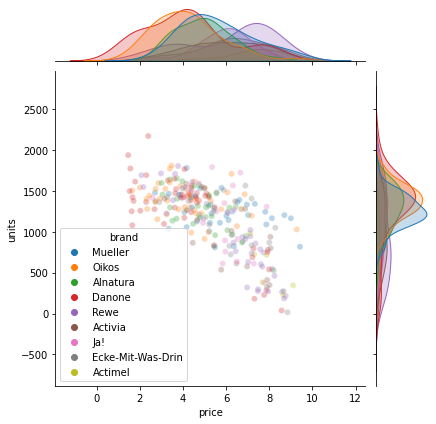

In [19]:
# Relation of price to units
sns.jointplot(x='price',y='units',data=df, hue="brand", alpha =0.3)

We can appreciate a negative linear relation between the price and units. The brands that seemed to be spread in most of the range are Danone and Rewe. Oikos and Alnatura remain mostly in the top part of units sold. 

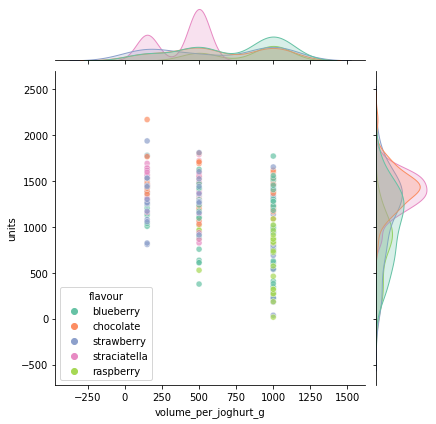

In [20]:
# Relation of volume to units
sns.jointplot(x='volume_per_joghurt_g',y='units',data=df, hue="flavour", alpha =0.7, palette="Set2")

Blueberry and raspberry flavours in 1000g package sell less units than small volumes of straciatella and chocolate. 

The parameter "price" has the highest correlation to units. A linear model can be use to predict units sold given the change in prices. 

 From literature we know the relation between the percentage change in prices over the percentage change in demand (units) is known as price elasticity.

One approach to model the data is to obtain the slope of the linear regression of each product_id. With the slope it is possible to estimate the price elasticity eta = slope * mean(prices)/mean(units). 

Elasticities between -1< eta < 0 are known as innelastic since the demand wont be affected by the price changes. Products with price elasticities below -1 have more effect in the demand by small variatons in prices.

Another approach would be to compare the multilinear regression considering all data attributes against the simple linear regression over all products. We will follow this approach first. 